In [17]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract
import os

# OCR with pytesseract

This notebook shows how to use the `pytesseract` package to read text from an image. It assumes that the input is a small image that contains only one toponym.

## Image processing

Here we use 10 sample images that were obtained by manually cropping a large image. All images are in `jpg` format. We use 4 image transformations using filters from the `pillow` package. The filter/transformations are listed below.

- Contour filter from PIL library.
- Emboss filter from PIL library.
- RankFilter from PIL library.
- Combined: Contour filter + black and white conversion with a threshold.

In [85]:
def display_imgs(filt=None):
    """
    Display 10 sample images in a 5x2 matrix. 
    
    Arguments
    ---------
        filt: str
            Optional filter to be applied to the images.
            Options: contour, emboss, rank, combined
    
    Output
    ------
        images: list of PIL.Image objects
            A list of the 10 sample images.
    """
    images = []
    fig, axs = plt.subplots(5,2, figsize=(12,6))
    
    for col in range(2):
        for row in range(5):
            img = Image.open(f"ocr_sample_imgs/sample{row+col*5+1}.jpg")            
            
            if filt == "contour":
                img = img.filter(ImageFilter.CONTOUR)
                
            if filt == "emboss":
                img = img.filter(ImageFilter.EMBOSS)
                
            if filt == "rank":
                img = img.filter(ImageFilter.RankFilter(size=3, rank=0))
                
            if filt == "combined":
                img = img.filter(ImageFilter.CONTOUR).convert("L").point(
                                 lambda x: 255 if x > 210 else 0, mode="1")                
            
            images.append(img)
            axs[row][col].imshow(img)
            axs[row][col].axis("off")
            
    return images

## Original sample images

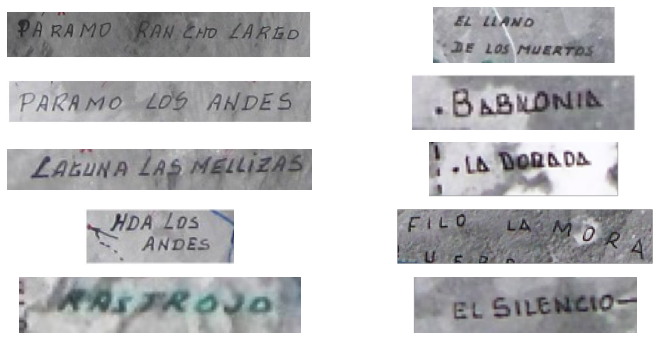

In [86]:
images = display_imgs()

### Contour filter

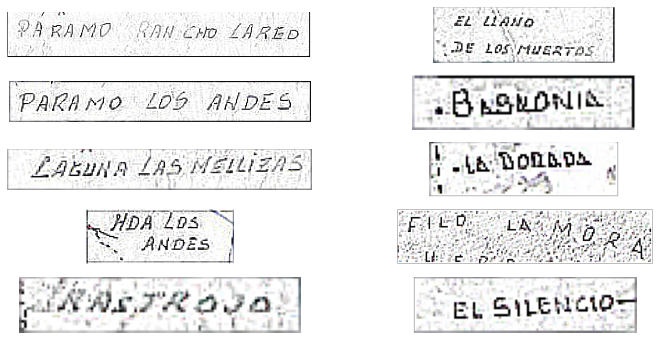

In [87]:
cont_imgs = display_imgs("contour")

### Emboss filter

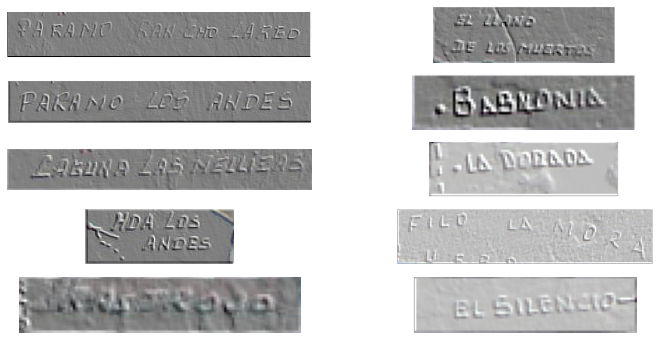

In [88]:
emb_imgs = display_imgs("emboss")

### Rank filter

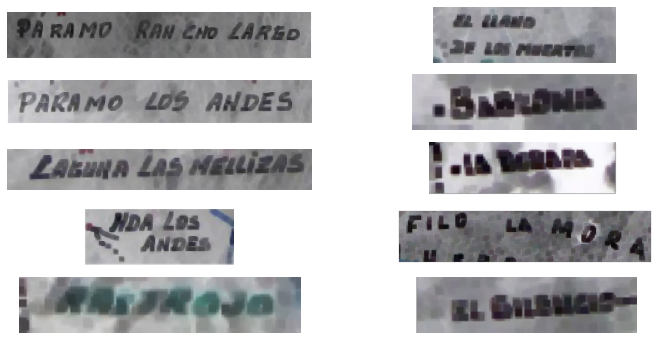

In [89]:
rank_imgs = display_imgs("rank")

### Contour filter + B&W

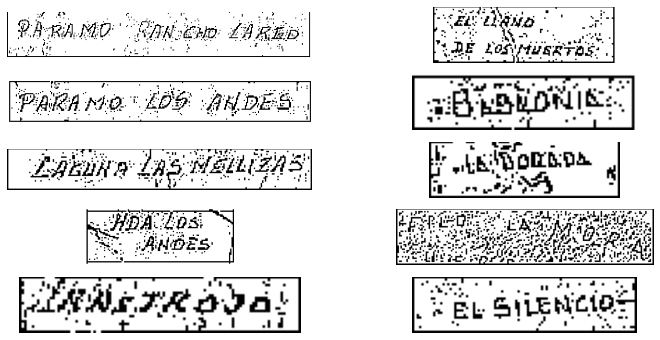

In [90]:
comb_imgs = display_imgs("combined")

---

## Use pytesseract package to convert image to text

In [96]:
def print_text(imgs):
    for img in imgs:
        text = pytesseract.image_to_string(img,lang="spa")
        print("*"+" ".join(text.split())+"*")

**Original images**

In [97]:
print_text(images)

**
**
*LabUnA Lag MELIZAS*
*MWDA Los S ANDES |*
*SAA AR OJOS*
*£ ANO ae 1h ri A*
**
**
*ES*
*EL SuENerO"*


**Contour filter**

In [98]:
print_text(cont_imgs)

*(ANEXO LARED*
**
*LIEUNA LAS MELUIZAS*
**
**
*EL tigrio*
**
*y «Aa BOMÉDA y*
**
*EL SMENCIOS*


**Emboss filter**

In [99]:
print_text(emb_imgs)

**
**
**
**
**
**
**
**
*AS AE S*
*EUENSOS*


**Rank filter**

In [100]:
print_text(rank_imgs)

*PARAMO Ran Eno LARGO Le e la ,*
*PARAMO 409 ANDES.*
**
**
**
**
*» Da*
**
**
*xL Ouao—*


**Contour + B&W**

In [101]:
print_text(comb_imgs)

*PARAMO*
*PAagarmo 106 MUDES.*
**
**
**
**
**
**
**
*Ce En SILENCIO*


## Results summary

|True label             |No filter          |Contour            |Emboss |Rank|Contour + B\&W|
|:----------------------|:------------------|:------------------|:------|:---|:-------------|
|PÁRAMO RANCHO LARGO    |                   |(ANEXO LARED       |       |PARAMO Ran Eno LARGO Le e la ,|PARAMO|
|PARAMO LOS ANDES       |                   |                   |       |PARAMO 409 ANDES.|PAagarmo 106 MUDES.|
|LAGUNA LAS MELLIZAS    |LabUnA Lag MELIZAS |LIEUNA LAS MELUIZAS|       | | |
|HDA LOS ANDES          |MWDA Los S ANDES \||                   |       | | |
|RASTROJO               |SAA AR OJOS        |                   |       | | |
|EL LLANO DE LOS MUERTOS|£ ANO ae 1h ri A   |EL tigrio          |       | | |
|BABILONIA              |                   |                   |       | | |
|LA DORADA              |                   |y «Aa BOMÉDA y     |       | | | 
|FILO LA MORA           |ES                 |                   |AS AE S| | |
|EL SILENCIO            |EL SuENerO         |EL SMENCIOS        |EUENSOS|Ce En SILENCIO|Ce En SILENCIO|

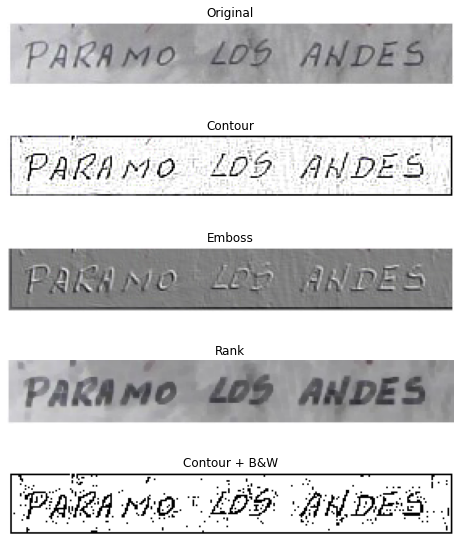

In [107]:
fig, axs = plt.subplots(5,1,figsize=(8,10))
titles = ["Original", "Contour", "Emboss", "Rank", "Contour + B&W"]
img_list = [images, cont_imgs, emb_imgs, rank_imgs, comb_imgs]

for i in range(5):
    axs[i].imshow(img_list[i][1])
    axs[i].set_title(titles[i])
    axs[i].axis("off")

### Final comments

All the filters increase the contrast between the text and the background, especially the PIL.ImageFilter.CONTOUR filter. However, the `pytesseract` ocr package performs poorly translating the images to text. [In this blog](https://pythonforundergradengineers.com/how-to-install-pytesseract.html), it says that:
> It works best with computer-generated text like text in PDFs or pictures of receipts and invoices. It has a tougher time with images that contain handwritten words.

Therefore, I think we should either find another library that specializes in handwritten text, or create and train our own model. Here there is an example of implementing a deep learning architecture (CNN + RNN + CTC) in python.